# Pandas e um pouco mais...

## Estrutura de dados: Series e DataFrame

### **Series:** vetor unidimensional com rótulo para cada item.

In [ ]:
import pandas as pd
s = pd.Series([10, 20, 30], index=['a', 'b', 'c'])
s

,0
a,10
b,20
c,30


### **DataFrame:** tabela bidimensional com colunas nomeadas e index.

In [ ]:
df = pd.DataFrame({'A': [1, 2], 'B': [3, 4], 'C': [5, 6], 'D': [7, 8]})
df.head()

,A,B,C,D
0,1,3,5,7
1,2,4,6,8


## Leitura e escrita de arquivos (CSV, Excel, etc.)

In [ ]:
# CSV: Import
# df = pd.read_csv('arquivo.csv')
# df.head()

# CSV: Export
# df.to_csv('saida.csv', index=False)

In [ ]:
# Excel: Import
# df = pd.read_excel('arquivo.xlsx')
# df.head()

# Excel: Export
# df.to_excel('saida.xlsx', index=False)

## Indexação e seleção de dados (loc, iloc)

**loc:** usa rótulos (nomes) do índice.

In [ ]:
df = pd.DataFrame({'A': [1, 2], 'B': [3, 4], 'C': [5, 6], 'D': [7, 8]})
df.loc[:,'A']

,A
0,1
1,2


In [ ]:
df['A']

,A
0,1
1,2


**iloc:** usa posições numéricas.

In [ ]:
df.iloc[0]

,0
A,1
B,3
C,5
D,7


**Filtros e condições**

In [ ]:
df[df['A'] > 1]

,A,B,C,D
1,2,4,6,8


## Manipulação de colunas e linhas

Adicionar coluna:

In [ ]:
df['C'] = df['A'] + df['B']
df.head()

,A,B,C,D
0,1,3,4,7
1,2,4,6,8


Remover coluna:

In [ ]:
df.drop('C', axis=1, inplace=True)
df.head()

,A,B,D
0,1,3,7
1,2,4,8


Adicionar linha:

In [ ]:
df.loc[len(df)] = [5, 6, 9]
df.head()

,A,B,D
0,1,3,7
1,2,4,8
2,5,6,9


## Agrupamento de dados (groupby)

Agrupa e aplica funções agregadas

In [ ]:
df = pd.DataFrame({
    'Categoria': ['Focus', 'I30', 'HB20', 'Onix', 'Focus', 'I30', 'HB20', 'Onix'],
    'Valor': [35000, 37000, 80000, 70000, 36000, 36500, 82000, 71000]
})

media_valores = df.groupby('Categoria')['Valor'].mean()
media_valores

,Valor
Categoria,
Focus,35500.0
HB20,81000.0
I30,36750.0
Onix,70500.0


## Mesclagem e junção de DataFrames (merge, concat, join)

**merge** (semelhante ao SQL JOIN):

In [ ]:
clientes = pd.DataFrame({
    'id': [1, 2, 3],
    'nome': ['Ana', 'Bruno', 'Carlos']
})

pedidos = pd.DataFrame({
    'id': [1, 2, 2, 3, 4],
    'produto': ['Notebook', 'Mouse', 'Teclado', 'Monitor', 'Headset']
})

df_merged = pd.merge(clientes, pedidos, on='id', how='inner')
df_merged

,id,nome,produto
0,1,Ana,Notebook
1,2,Bruno,Mouse
2,2,Bruno,Teclado
3,3,Carlos,Monitor


**concat** (empilhar DataFrames):

In [ ]:
loja1 = pd.DataFrame({
    'Produto': ['Cadeira', 'Mesa'],
    'Valor': [150, 300]
})

loja2 = pd.DataFrame({
    'Produto': ['Sofá', 'Armário'],
    'Valor': [800, 650]
})

df_concat = pd.concat([loja1, loja2], axis=0, ignore_index=True)
df_concat

,Produto,Valor
0,Cadeira,150
1,Mesa,300
2,Sofá,800
3,Armário,650


**join** (usa o índice):

In [ ]:
df1 = pd.DataFrame({
    'Nome': ['Ana', 'Bruno', 'Carlos']
}, index=[1, 2, 3])

df2 = pd.DataFrame({
    'Cidade': ['SP', 'RJ', 'BH']
}, index=[1, 2, 3])

df_joined = df1.join(df2, how='left')
df_joined

,Nome,Cidade
1,Ana,SP
2,Bruno,RJ
3,Carlos,BH


## Tratamento de valores nulos e duplicados

### Valores nulos:

Tratando valores nulos

In [ ]:
df = pd.DataFrame({
    'Nome': ['Ana', 'Bruno', 'Carlos', 'João', None],
    'Idade': [25, None, 30, 25, 40],
    'Cidade': ['SP', 'RJ', 'BH', 'SP', None]
})
df.head()

,Nome,Idade,Cidade
0,Ana,25.0,SP
1,Bruno,NaN,RJ
2,Carlos,30.0,BH
3,João,25.0,SP
4,None,40.0,None


In [ ]:
df.isnull().sum()

,0
Nome,1
Idade,1
Cidade,1


In [ ]:
df.fillna(
  {
      'Nome': 'Desconhecido',
      'Idade': df['Idade'].mean(), # repare que estamos utilizando a média para prencher o dado nulo
      'Cidade': 'Não informado'
  },
  inplace=True
)

In [ ]:
df.head()

,Nome,Idade,Cidade
0,Ana,25.0,SP
1,Bruno,30.0,RJ
2,Carlos,30.0,BH
3,João,25.0,SP
4,Desconhecido,40.0,Não informado


### Excluindo valores nulos

In [ ]:
df = pd.DataFrame({
    'Nome': ['Ana', 'Bruno', 'Carlos', 'João', None],
    'Idade': [25, None, 30, 25, 40],
    'Cidade': ['SP', 'RJ', 'BH', 'SP', None]
})
df.head()

,Nome,Idade,Cidade
0,Ana,25.0,SP
1,Bruno,NaN,RJ
2,Carlos,30.0,BH
3,João,25.0,SP
4,None,40.0,None


In [ ]:
df.dropna(inplace=True)
df.head()

,Nome,Idade,Cidade
0,Ana,25.0,SP
2,Carlos,30.0,BH
3,João,25.0,SP


## Excluindo duplicatas




In [ ]:
df = pd.DataFrame({
    'Nome': ['Ana', 'Bruno', 'Carlos', 'Ana'],
    'Idade': [25, 30, 25, 25],
    'Cidade': ['SP', 'RJ', 'BH', 'SP']
})
df.head()

,Nome,Idade,Cidade
0,Ana,25,SP
1,Bruno,30,RJ
2,Carlos,25,BH
3,Ana,25,SP


In [ ]:
df.drop_duplicates(inplace=True)
df.head()

,Nome,Idade,Cidade
0,Ana,25,SP
1,Bruno,30,RJ
2,Carlos,25,BH


## Aplicação de funções com apply, map e lambda

**apply** em colunas:

In [ ]:
df = pd.DataFrame({'A': [1, 2, 3, 4, 5]})
df.head()

,A
0,1
1,2
2,3
3,4
4,5


In [ ]:
df['A_dobrado'] = df['A'].apply(lambda x: x * 2)
df.head()

,A,A_dobrado
0,1,2
1,2,4
2,3,6
3,4,8
4,5,10


**map** em Series:

In [ ]:
df = pd.DataFrame({'A': [1, 2, 3, 4, 5]})
df.head()

,A
0,1
1,2
2,3
3,4
4,5


In [ ]:
df['A_texto'] = df['A'].map({1: 'um', 2: 'dois', 3: 'três', 4: 'quatro', 5: 'cinco'})
df.head()

,A,A_texto
0,1,um
1,2,dois
2,3,três
3,4,quatro
4,5,cinco


## Ordenação e rearranjo de dados

Ordenar por valores:

In [ ]:
df = pd.DataFrame({
    'Nome': ['Carlos', 'Ana', 'Bruno', 'Daniela'],
    'Idade': [32, 25, 28, 30]
})
df.head()

,Nome,Idade
0,Carlos,32
1,Ana,25
2,Bruno,28
3,Daniela,30


In [ ]:
df = df.sort_values(by='Idade')
df.head()

,Nome,Idade
1,Ana,25
2,Bruno,28
3,Daniela,30
0,Carlos,32


Ordenar por índice

In [ ]:
df = pd.DataFrame({
    'Nome': ['Carlos', 'Ana', 'Bruno', 'Daniela'],
    'Idade': [32, 25, 28, 30]
})

# embaralhando os indices para o exemplo
df = df.sample(frac=1).reset_index(drop=True)
df.index = [10, 5, 20, 15]
# --------------------------------------------

df.head()

,Nome,Idade
10,Bruno,28
5,Daniela,30
20,Ana,25
15,Carlos,32


In [ ]:
df = df.sort_index()
df.head()

,Nome,Idade
5,Daniela,30
10,Bruno,28
15,Carlos,32
20,Ana,25


## Pivot e Pivot Table

**pivot**: reorganiza dados (necessita dados únicos).

In [ ]:
df = pd.DataFrame({
    'data': ['2024-01-01', '2024-01-01', '2024-01-03', '2024-01-04'],
    'categoria': ['A', 'A', 'C', 'D'],
    'valor': [10, 10, 15, 25]
})
df.head()

,data,categoria,valor
0,2024-01-01,A,10
1,2024-01-01,A,10
2,2024-01-03,C,15
3,2024-01-04,D,25


In [ ]:
# Usar "pivot" quando não houver duplicatas
# df = df.pivot(index='data', columns='categoria', values='valor') # -> ValueError: Index contains duplicate entries, cannot reshape
# df.head()

In [ ]:
# Exemplo correto
df = pd.DataFrame({
    'data': ['2024-01-01', '2024-01-01', '2024-01-02', '2024-01-03'],
    'categoria': ['A', 'B', 'A', 'C'],
    'valor': [10, 20, 15, 25]
})
df.head()

,data,categoria,valor
0,2024-01-01,A,10
1,2024-01-01,B,20
2,2024-01-02,A,15
3,2024-01-03,C,25


In [ ]:
df = df.pivot(index='data', columns='categoria', values='valor')
df.head()

categoria,A,B,C
data,,,
2024-01-01,10.0,20.0,NaN
2024-01-02,15.0,NaN,NaN
2024-01-03,NaN,NaN,25.0


**pivot_table**: permite agregação.

In [ ]:
df2 = pd.DataFrame({
    'data': ['2024-01-01', '2024-01-01', '2024-01-01', '2024-01-02'],
    'categoria': ['A', 'A', 'B', 'A'],
    'valor': [10, 5, 20, 15]
})
df.head()

categoria,A,B,C
data,,,
2024-01-01,10.0,20.0,NaN
2024-01-02,15.0,NaN,NaN
2024-01-03,NaN,NaN,25.0


In [ ]:
# Soma como função de agregação
df = df2.pivot_table(index='data', columns='categoria', values='valor', aggfunc='sum')
df.head()

categoria,A,B
data,,
2024-01-01,15.0,20.0
2024-01-02,15.0,NaN


# Estatística Descritiva

## Medidas de tendência central (média, mediana, moda)

In [ ]:
df = pd.DataFrame({
    'Categoria': ['Focus', 'I30', 'HB20', 'Onix', 'Focus', 'I30', 'HB20', 'Onix', 'Tucson'],
    'Valor': [35000, 37000, 80000, 70000, 36000, 36500, 82000, 71000, 80000]
})
df.head()

,Categoria,Valor
0,Focus,35000
1,I30,37000
2,HB20,80000
3,Onix,70000
4,Focus,36000


**Média**: valor médio dos valores

In [ ]:
media = df.mean(numeric_only=True)
media

,0
Valor,58611.111111


**Mediana**: valor central dos valores

In [ ]:
mediana = df.median(numeric_only=True)
mediana

,0
Valor,70000.0


**Moda**: valor mais frequente entre os valores

In [ ]:
moda = df.mode(numeric_only=True)
moda

,Valor
0,80000


Transformando variáveis categoricas em variáveis numéricas

In [ ]:
df['Categoria_cod'] = df['Categoria'].astype('category').cat.codes # Convertendo variaveis categoricas em numeros para melhor utilizacao
# PS: Podemos usar one hot encoding / label enconder / cat.codes

df = df.drop('Categoria', axis=1) # axis=1 -> coluna | axis=0 -> linha
df.head(10)

,Valor,Categoria_cod
0,35000,0
1,37000,2
2,80000,1
3,70000,3
4,36000,0
5,36500,2
6,82000,1
7,71000,3
8,80000,4


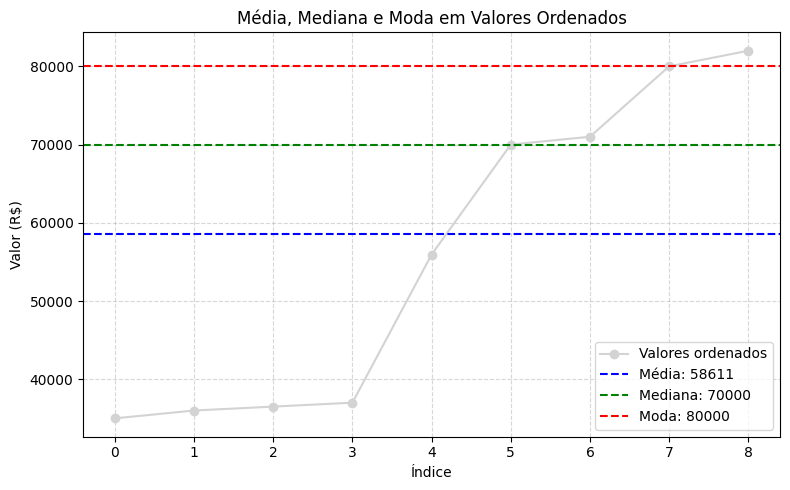

In [ ]:
import matplotlib.pyplot as plt

sorted_values = sorted(df['Valor'])

plt.figure(figsize=(8, 5))
plt.plot(sorted_values, marker='o', linestyle='-', color='lightgray', label='Valores ordenados')

media_valor = media.iloc[0]
mediana_valor = mediana.iloc[0]
moda_valor = moda['Valor'].iloc[0]

plt.axhline(media_valor, color='blue', linestyle='--', label=f'Média: {media_valor:.0f}')
plt.axhline(mediana_valor, color='green', linestyle='--', label=f'Mediana: {mediana_valor:.0f}')
plt.axhline(moda_valor, color='red', linestyle='--', label=f'Moda: {moda_valor:.0f}')

plt.title('Média, Mediana e Moda em Valores Ordenados')
plt.xlabel('Índice')
plt.ylabel('Valor (R$)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Excplicação passo a passo da construção do gráfico acima...

Ordenando valores...

In [ ]:
sorted_values = sorted(df['Valor'])
sorted_values

[35000, 36000, 36500, 37000, 70000, 71000, 80000, 80000, 82000]

Criando a linha de valores para o nosso gráfico

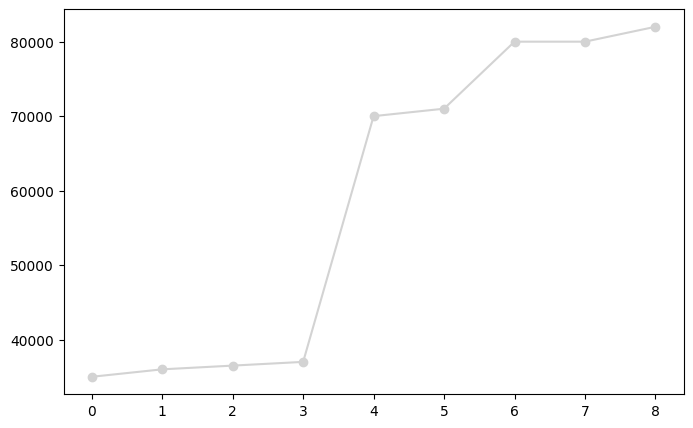

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(sorted_values, marker='o', linestyle='-', color='lightgray', label='Valores ordenados')

Pegando os valores para uso...

In [ ]:
media_valor = media.iloc[0]
media_valor

np.float64(58611.11111111111)

In [ ]:
mediana_valor = mediana.iloc[0]
mediana_valor

np.float64(70000.0)

In [ ]:
moda_valor = moda['Valor'].iloc[0]
moda_valor

np.int64(80000)

Formatando linhas e valores para exibição...

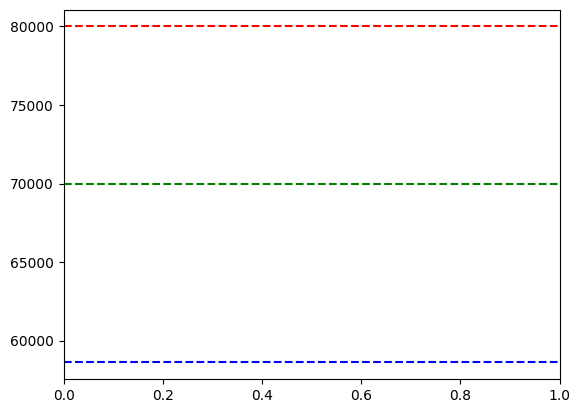

In [ ]:
plt.axhline(media_valor, color='blue', linestyle='--', label=f'Média: {media_valor:.0f}')
plt.axhline(mediana_valor, color='green', linestyle='--', label=f'Mediana: {mediana_valor:.0f}')
plt.axhline(moda_valor, color='red', linestyle='--', label=f'Moda: {moda_valor:.0f}')

Criando/exibindo nosso gráfico...

<ipython-input-316-d16e4c1a5a54>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


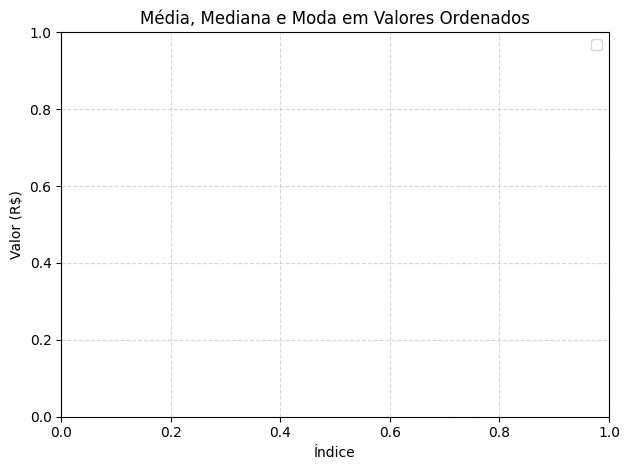

In [ ]:
plt.title('Média, Mediana e Moda em Valores Ordenados')
plt.xlabel('Índice')
plt.ylabel('Valor (R$)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Medidas de dispersão (desvio padrão, variância, amplitude)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'valores': [5, 8, 10, 10, 12, 13, 15, 18, 20]
})

**Desvio padrão**: grau de dispersão dos dados

In [ ]:
desvio_padrao = df['valores'].std()
desvio_padrao

4.769696007084728

**Variância**: média dos quadrados dos desvios

In [ ]:
variancia = df['valores'].var()
variancia

22.75

In [ ]:
amplitude = df['valores'].max() - df['valores'].min()
amplitude

15

**Amplitude**: diferença entre maior e menor valor

In [ ]:
quartis = df['valores'].quantile([0.25, 0.5, 0.75])

## Quartis e percentis

**Quartis**: dividem os dados em 4 partes iguais

In [ ]:
df = pd.DataFrame({'valores': [5, 8, 10, 10, 12, 13, 15, 18, 20]})
df.head()

,valores
0,5
1,8
2,10
3,10
4,12


In [ ]:
quartis = df['valores'].quantile([0.25, 0.5, 0.75])
quartis

,valores
0.25,10.0
0.50,12.0
0.75,15.0


In [ ]:
percentil_90 = df['valores'].quantile(0.90)
percentil_90

np.float64(18.4)

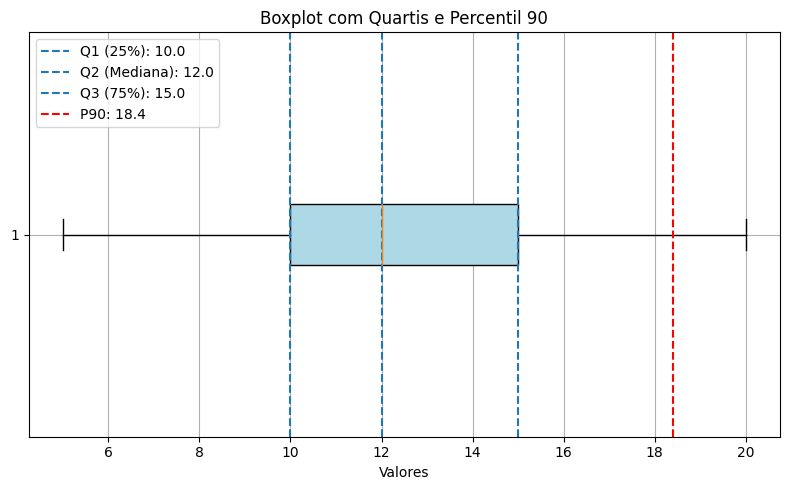

In [ ]:
plt.figure(figsize=(8, 5))
plt.boxplot(df, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Boxplot com Quartis e Percentil 90')
plt.xlabel('Valores')

for q, label in zip(quartis, ['Q1 (25%)', 'Q2 (Mediana)', 'Q3 (75%)']):
    plt.axvline(q, linestyle='--', label=f'{label}: {q:.1f}')

plt.axvline(percentil_90, color='red', linestyle='--', label=f'P90: {percentil_90:.1f}')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

* Q1 (25%) = 10.0 → início da caixa.

* Q2 (Mediana) = 12.0 → linha no meio da caixa.

* Q3 (75%) = 15.0 → fim da caixa.

* P90 = 18.4 → linha vermelha à direita, indicando que 90% dos valores estão abaixo disso.

## Medidas de posição relativa (z-score)

Mostra o quão distante (em desvios padrão) cada nota está da média.

In [ ]:
from scipy.stats import zscore

dados = {
    'aluno': ['Ana', 'Bruno', 'Carlos', 'Diana', 'Eduardo'],
    'nota': [7.5, 8.0, 6.5, 9.0, 5.5]
}

df = pd.DataFrame(dados)
df.head()

,aluno,nota
0,Ana,7.5
1,Bruno,8.0
2,Carlos,6.5
3,Diana,9.0
4,Eduardo,5.5


In [ ]:
df['nota'].mean() # Média das notas = 7.3

np.float64(7.3)

In [ ]:
# Calculando o z-score da coluna 'nota'
df['zscore'] = zscore(df['nota'])
df.head()

,aluno,nota,zscore
0,Ana,7.5,0.165521
1,Bruno,8.0,0.579324
2,Carlos,6.5,-0.662085
3,Diana,9.0,1.406930
4,Eduardo,5.5,-1.489691


## Distribuição de frequências



In [ ]:
dados = {
    'cor_preferida': ['azul', 'verde', 'azul', 'vermelho', 'azul', 'verde', 'azul', 'vermelho']
}

df = pd.DataFrame(dados)
df.head()

,cor_preferida
0,azul
1,verde
2,azul
3,vermelho
4,azul


In [ ]:
# Contando a frequência de cada cor
frequencias = df['cor_preferida'].value_counts()
frequencias

,count
cor_preferida,
azul,4
verde,2
vermelho,2


## Distribuições: Assimetria e Curtose

Servem paraentender a forma da distribuição dos dados

### Assimetria (Skewness)

* X > 0: Distribuição assimétrica à direita (cauda mais longa para valores altos).

* X < 0: Assimetria à esquerda (cauda para valores baixos).

* X = 0: Distribuição simétrica.

In [ ]:
dados = {'vendas': [10, 12, 14, 15, 16, 18, 25, 40, 100]}
df = pd.DataFrame(dados)

df.head()

,vendas
0,10
1,12
2,14
3,15
4,16


In [ ]:
assimetria = df['vendas'].skew()
assimetria

np.float64(2.4952536484500936)

### Curtose (Kurtosis)

* X > 0: Distribuição mais pontiaguda (leptocúrtica).

* X < 0: Distribuição mais achatada (platicúrtica).

* X = 0: Distribuição normal (mesocúrtica).

In [ ]:
dados = {'vendas': [10, 12, 14, 15, 16, 18, 25, 40, 100]}
df = pd.DataFrame(dados)

df.head()

,vendas
0,10
1,12
2,14
3,15
4,16


In [ ]:
curtose = df['vendas'].kurt()
curtose

np.float64(6.492366139532878)

## Correlação e covariância

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

dados = {
    'idade': [20, 22, 25, 30, 35, 40, 45, 50],
    'salario': [1500, 1800, 2200, 2800, 3400, 4000, 4500, 5000],
    'horas_trabalho': [20, 25, 30, 35, 40, 45, 50, 55]
}

df = pd.DataFrame(dados)
df.head()

,idade,salario,horas_trabalho
0,20,1500,20
1,22,1800,25
2,25,2200,30
3,30,2800,35
4,35,3400,40


### **Correlação**: relação linear entre variáveis (-1 a 1)

ndica direção e força da relação linear

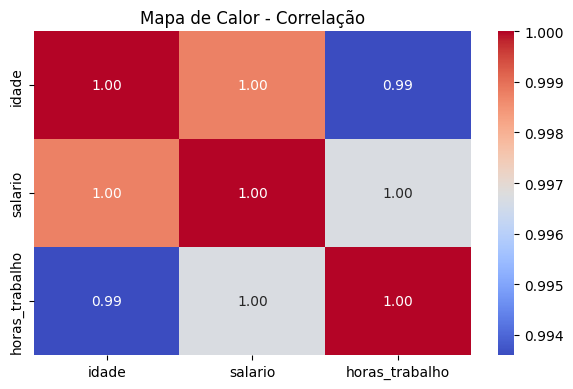

In [ ]:
# df.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor - Correlação')
plt.tight_layout()
plt.show()

### **Covariância**: variação conjunta das variáveis

Mostra se as variáveis crescem ou diminuem juntas (sem padronização)

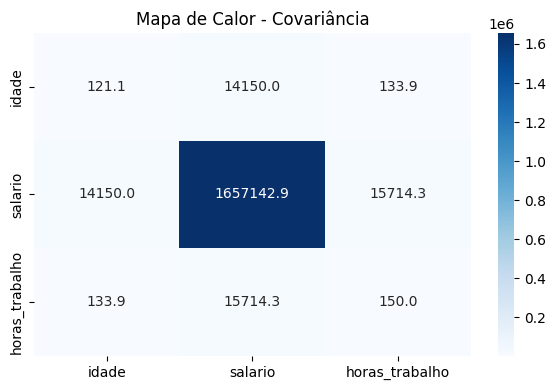

In [ ]:
# df.cov(

plt.figure(figsize=(6, 4))
sns.heatmap(df.cov(), annot=True, cmap='Blues', fmt=".1f")
plt.title('Mapa de Calor - Covariância')
plt.tight_layout()
plt.show()

## Identificação de outliers


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
dados = np.append(np.random.normal(50, 10, 100), [120, 130, 140])
df = pd.DataFrame({'coluna': dados})
df.head()

,coluna
0,54.967142
1,48.617357
2,56.476885
3,65.230299
4,47.658466


## Método do IQR (intervalo interquartil):

In [ ]:
Q1 = df['coluna'].quantile(0.25)
Q3 = df['coluna'].quantile(0.75)
IQR = Q3 - Q1
IQR

np.float64(11.093768479295491)

In [ ]:
outliers = df[(df['coluna'] < Q1 - 1.5 * IQR) | (df['coluna'] > Q3 + 1.5 * IQR)]
outliers

,coluna
74,23.802549
100,120.000000
101,130.000000
102,140.000000


* A linha central (mediana)

* As bordas da caixa (Q1 e Q3)

* Os "bigodes" (limites sem outliers)

* Os outliers como pontos individuais fora dos "bigodes"

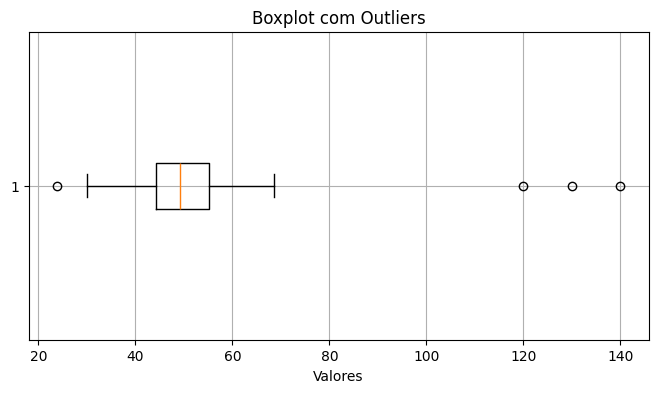

In [ ]:
plt.figure(figsize=(8, 4))
plt.boxplot(df['coluna'], vert=False)
plt.title('Boxplot com Outliers')
plt.xlabel('Valores')
plt.grid(True)
plt.show()

# Análise Exploratória de Dados (EDA)

In [ ]:
df = pd.DataFrame({
    'Categoria': ['Focus', 'I30', 'HB20', 'Onix', 'Focus', 'I30', 'HB20', 'Onix', 'Tucson'],
    'Valor': [35000, 37000, 80000, 70000, 36000, 36500, 82000, 71000, None]
})
df.head(10)

,Categoria,Valor
0,Focus,35000.0
1,I30,37000.0
2,HB20,80000.0
3,Onix,70000.0
4,Focus,36000.0
5,I30,36500.0
6,HB20,82000.0
7,Onix,71000.0
8,Tucson,NaN


## Inspeção de tipos e estruturas de dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Categoria  9 non-null      object 
 1   Valor      8 non-null      float64
dtypes: float64(1), object(1)
memory usage: 276.0+ bytes


In [ ]:
df.dtypes

,0
Categoria,object
Valor,float64


In [ ]:
df.shape # 9 linhas e 2 colunas

(9, 2)

## Sumário estatístico

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Valor,8.0,55937.5,21564.583233,35000.0,36375.0,53500.0,73250.0,82000.0


## Detecção de valores faltantes e inconsistências

In [ ]:
df.isnull().sum()

,0
Categoria,0
Valor,1


In [ ]:
print(df['Categoria'].unique())

['Focus' 'I30' 'HB20' 'Onix' 'Tucson']


In [ ]:
df['Categoria'].value_counts()

,count
Categoria,
Focus,2
I30,2
HB20,2
Onix,2
Tucson,1


## Distribuição de variáveis

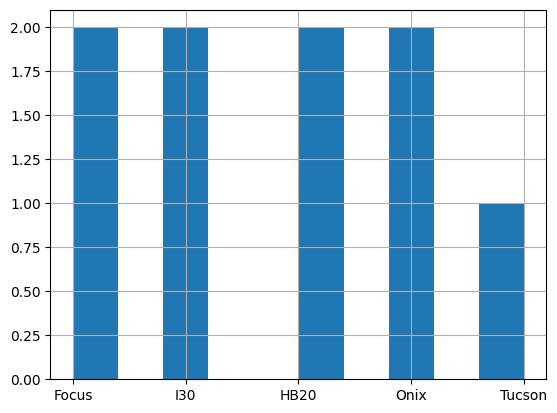

In [ ]:
import matplotlib.pyplot as plt

df['Categoria'].hist()
plt.show()

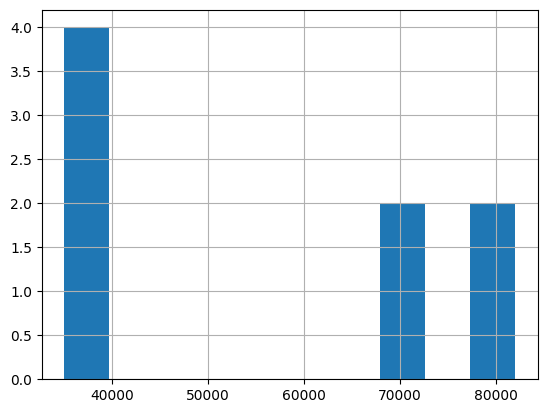

In [ ]:
df['Valor'].hist()
plt.show()

## Relações entre variáveis (correlação, dispersão)

In [ ]:
df.head(10)

,Categoria,Valor
0,Focus,35000.0
1,I30,37000.0
2,HB20,80000.0
3,Onix,70000.0
4,Focus,36000.0
5,I30,36500.0
6,HB20,82000.0
7,Onix,71000.0
8,Tucson,NaN


In [ ]:
df['Valor'] = df['Valor'].fillna(df['Valor'].mean()) # Tratando o valor nulo
df.head(10)

,Categoria,Valor
0,Focus,35000.0
1,I30,37000.0
2,HB20,80000.0
3,Onix,70000.0
4,Focus,36000.0
5,I30,36500.0
6,HB20,82000.0
7,Onix,71000.0
8,Tucson,55937.5


In [ ]:
df['Categoria_cod'] = df['Categoria'].astype('category').cat.codes # Convertendo variaveis categoricas em numeros para melhor utilizacao
# PS: Podemos usar one hot encoding / label enconder / cat.codes
df.head(10)

,Categoria,Valor,Categoria_cod
0,Focus,35000.0,0
1,I30,37000.0,2
2,HB20,80000.0,1
3,Onix,70000.0,3
4,Focus,36000.0,0
5,I30,36500.0,2
6,HB20,82000.0,1
7,Onix,71000.0,3
8,Tucson,55937.5,4


In [ ]:
correlacao = df[['Categoria_cod', 'Valor']].corr()
correlacao

,Categoria_cod,Valor
Categoria_cod,1.000000,0.269969
Valor,0.269969,1.000000


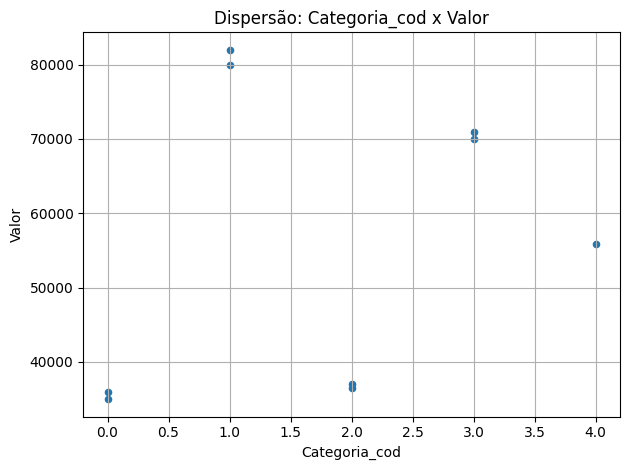

In [ ]:
df.plot.scatter(x='Categoria_cod', y='Valor', title='Dispersão: Categoria_cod x Valor')
plt.grid(True)
plt.tight_layout()
plt.show()

# Um pouco mais...

## Análise: Univariada, Bivariada e Multivariada

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame({
    'Categoria': ['Focus', 'I30', 'HB20', 'Onix', 'Focus', 'I30', 'HB20', 'Onix', 'Tucson', 'Focus', 'I30', 'HB20', 'Onix', 'Focus', 'I30', 'HB20', 'Onix', 'Tucson'],
    'Valor': [35000, 37000, 80000, 70000, 36000, 36500, 82000, 71000, 80000, 42000.0, 44400.0, 96000.0, 84000.0, 43200.0, 43800.0, 98400.0, 85200.0, 96000.0],
    'Ano': [2015, 2016, 2020, 2019, 2015, 2016, 2021, 2019, 2020, 2015, 2016, 2020, 2019, 2015, 2016, 2021, 2019, 2020],
    'KmRodado': [80000, 75000, 20000, 30000, 82000, 73000, 15000, 25000, 18000, 80000, 75000, 20000, 30000, 82000, 73000, 15000, 25000, 18000]
})

### Univariada

Examina uma única variável

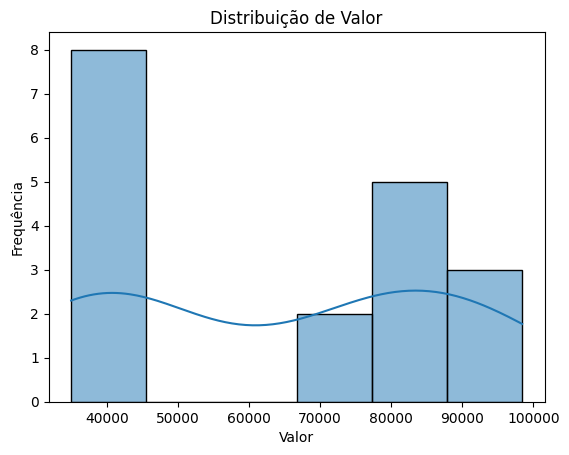

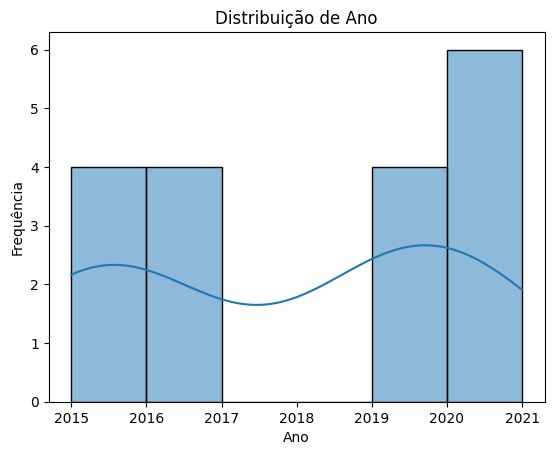

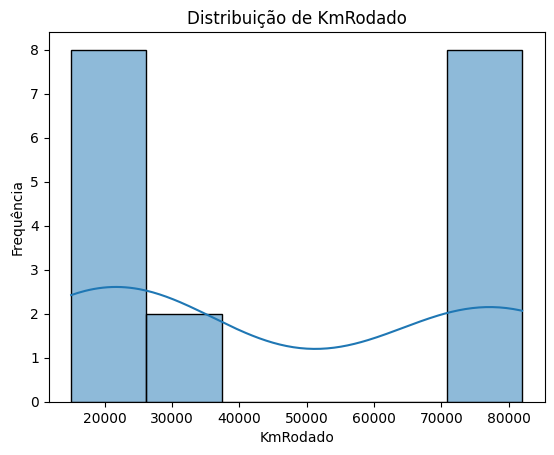

In [ ]:
num_cols = ['Valor', 'Ano', 'KmRodado']
for col in num_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.show()

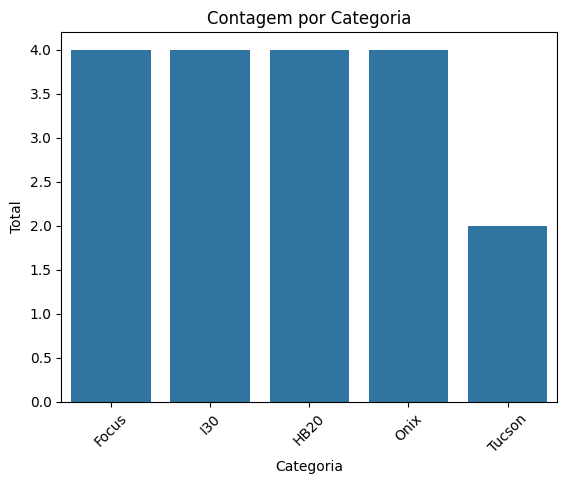

In [ ]:
cat_cols = ['Categoria']
for col in cat_cols:
    sns.countplot(x=col, data=df)
    plt.title(f'Contagem por {col}')
    plt.xlabel(col)
    plt.ylabel('Total')
    plt.xticks(rotation=45)
    plt.show()

### Bivariada

Examina duas variveis

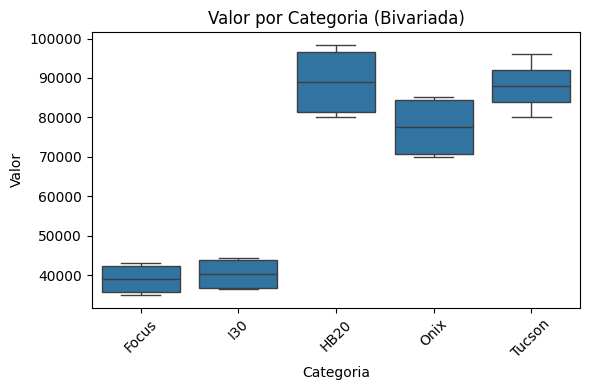

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Categoria', y='Valor', data=df)
plt.title('Valor por Categoria (Bivariada)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Multivariada

Examina três ou mais variaveis

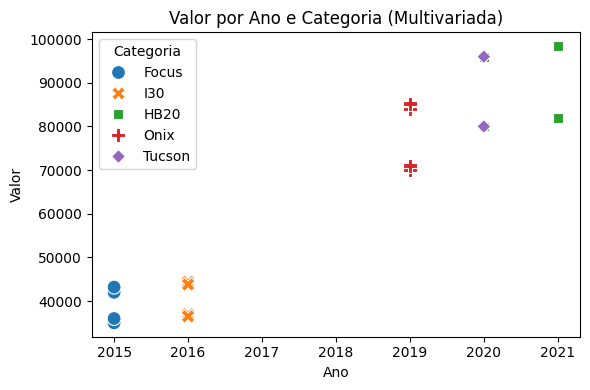

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Ano', y='Valor', hue='Categoria', style='Categoria', s=100)
plt.title('Valor por Ano e Categoria (Multivariada)')
plt.tight_layout()
plt.show()

## Análise de Similaridade por Agrupamento (Clustering de Variáveis)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame({
    'Categoria': ['Focus', 'I30', 'HB20', 'Onix', 'Focus', 'I30', 'HB20', 'Onix', 'Tucson', 'Focus', 'I30', 'HB20', 'Onix', 'Focus', 'I30', 'HB20', 'Onix', 'Tucson'],
    'Valor': [35000, 37000, 80000, 70000, 36000, 36500, 82000, 71000, 80000, 42000.0, 44400.0, 96000.0, 84000.0, 43200.0, 43800.0, 98400.0, 85200.0, 96000.0],
    'Ano': [2015, 2016, 2020, 2019, 2015, 2016, 2021, 2019, 2020, 2015, 2016, 2020, 2019, 2015, 2016, 2021, 2019, 2020],
    'KmRodado': [80000, 75000, 20000, 30000, 82000, 73000, 15000, 25000, 18000, 80000, 75000, 20000, 30000, 82000, 73000, 15000, 25000, 18000]
})

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import LabelEncoder

In [ ]:
df['Categoria_cod'] = LabelEncoder().fit_transform(df['Categoria'])

In [ ]:
numeric_df = df[['Valor', 'Ano', 'KmRodado', 'Categoria_cod']]

In [ ]:
linkage_matrix = linkage(numeric_df.T, method='ward')

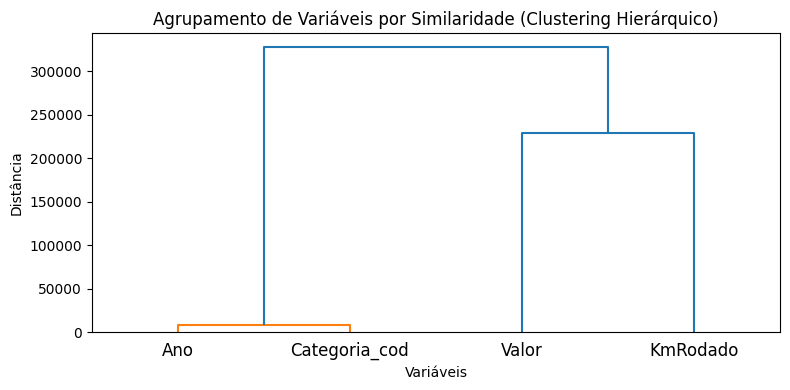

In [ ]:
plt.figure(figsize=(8, 4))
dendrogram(linkage_matrix, labels=numeric_df.columns)
plt.title('Agrupamento de Variáveis por Similaridade (Clustering Hierárquico)')
plt.xlabel('Variáveis')
plt.ylabel('Distância')
plt.tight_layout()
plt.show()

## VIF: Medida de multicolinearidade entre variáveis

Em suma:
  * Mede o quanto uma variável é explicada por outras variáveis.
  * Útil para remover variáveis redundantes.

---
Sobre os resultados:

* **VIF > 10 (alta multicolinearidade)**: variável altamente explicada por outras

* **VIF entre 6 e 10**: Possível correlação moderada

* **VIF <= 5**: ok (boa variável para manter em modelos preditivos)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame({
    'Categoria': ['Focus', 'I30', 'HB20', 'Onix', 'Focus', 'I30', 'HB20', 'Onix', 'Tucson', 'Focus', 'I30', 'HB20', 'Onix', 'Focus', 'I30', 'HB20', 'Onix', 'Tucson'],
    'Valor': [35000, 37000, 80000, 70000, 36000, 36500, 82000, 71000, 80000, 42000.0, 44400.0, 96000.0, 84000.0, 43200.0, 43800.0, 98400.0, 85200.0, 96000.0],
    'Ano': [2015, 2016, 2020, 2019, 2015, 2016, 2021, 2019, 2020, 2015, 2016, 2020, 2019, 2015, 2016, 2021, 2019, 2020],
    'KmRodado': [80000, 75000, 20000, 30000, 82000, 73000, 15000, 25000, 18000, 80000, 75000, 20000, 30000, 82000, 73000, 15000, 25000, 18000]
})

In [ ]:
# Codificando a variável categórica
df['Categoria_cod'] = LabelEncoder().fit_transform(df['Categoria'])

In [ ]:
import statsmodels.api as sm

X = df[['Valor', 'Ano', 'KmRodado', 'Categoria_cod']]

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variável"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i).round(2) for i in range(X.shape[1])]

vif_data

,Variável,VIF
0,Valor,113.34
1,Ano,275.03
2,KmRodado,53.07
3,Categoria_cod,4.08


## Entendendo importância das variáveis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np

df = pd.DataFrame({
    'Categoria': ['Focus', 'I30', 'HB20', 'Onix', 'Focus', 'I30', 'HB20', 'Onix', 'Tucson'],
    'Valor': [35000, 37000, 80000, 70000, 36000, 36500, 82000, 71000, 80000],
    'Ano': [2015, 2016, 2020, 2019, 2015, 2016, 2021, 2019, 2020],
    'KmRodado': [80000, 75000, 20000, 30000, 82000, 73000, 15000, 25000, 18000],
    'GarantiaEstendida': [1, 0, 1, 1, 1, 0, 1, 1, 1],
    'TemSeguro': [0, 1, 1, 1, 0, 1, 1, 1, 0],
    'Churn': [0, 0, 1, 1, 0, 0, 1, 1, 1]
})
df.head()

,Categoria,Valor,Ano,KmRodado,GarantiaEstendida,TemSeguro,Churn
0,Focus,35000,2015,80000,1,0,0
1,I30,37000,2016,75000,0,1,0
2,HB20,80000,2020,20000,1,1,1
3,Onix,70000,2019,30000,1,1,1
4,Focus,36000,2015,82000,1,0,0


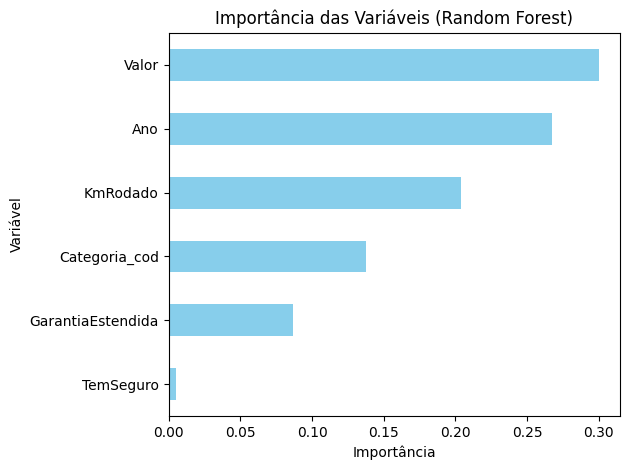

In [ ]:
df['Categoria_cod'] = LabelEncoder().fit_transform(df['Categoria'])

X = df.drop('Churn', axis=1).select_dtypes(include=np.number)
y = df['Churn']

modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X, y)

importancias = pd.Series(modelo.feature_importances_, index=X.columns)

importancias.sort_values().plot(kind='barh', color='skyblue')
plt.title('Importância das Variáveis (Random Forest)')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()